In [ ]:
#Instalando las dependencias 
pip install keras
pip install pandas
pip install matplotlib
pip install sklearn
pip install tensorflow
pip install tensorflow.compat.v2

!pip install keras
!pip install sklearn
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

In [ ]:
#Librerias de os
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

#Librerias para el manejo de datos
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Librerias para la Regresion Logística
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Librerias para construir el Clasificador Binario
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras import optimizers

print("Librerias importadas correctamente!!!")

In [42]:
header = ["Varianza", "Oblicuidad", "Curtosis", "Entropía", "Clase"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', names=header)
df.head(500)

,Varianza,Oblicuidad,Curtosis,Entropía,Clase
0,3.621600,8.6661,-2.80730,-0.44699,0
1,4.545900,8.1674,-2.45860,-1.46210,0
2,3.866000,-2.6383,1.92420,0.10645,0
3,3.456600,9.5228,-4.01120,-3.59440,0
4,0.329240,-4.4552,4.57180,-0.98880,0
...,...,...,...,...,...
495,-0.126240,10.3216,-3.71210,-6.11850,0
496,3.375600,-4.0951,4.36700,1.06980,0
497,-0.048008,-1.6037,8.47560,0.75558,0
498,0.570600,-0.0248,1.24210,-0.56210,0


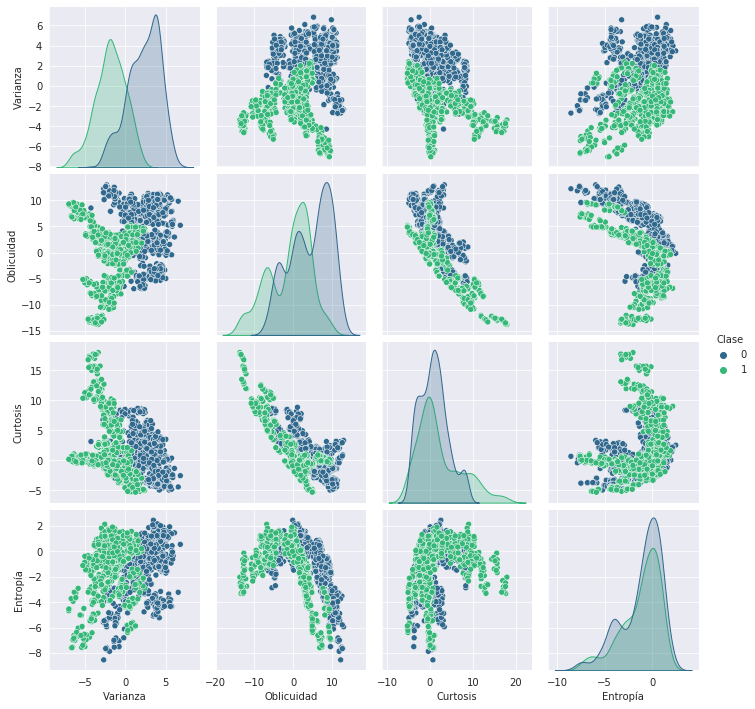

Estadisticas del dataset: 
           Varianza   Oblicuidad     Curtosis     Entropía        Clase
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observaciones por clase: 
 0    762
1    610
Name: Clase, dtype: int64


In [4]:
# Graficando información del dataset

import seaborn as sns
sns.set_style('darkgrid')
sns.pairplot(data=df, hue='Clase', palette = 'viridis')

plt.show()

print("Estadisticas del dataset: \n", df.describe())

print("Observaciones por clase: \n", df['Clase'].value_counts())

In [5]:
cols = df.columns[0:4]
X = np.array(df[cols].values)
Xs = preprocessing.scale(X)
y = np.array(df['Clase'])

ntr = 1000
nts = 372
Xtr, Xts, ytr, yts = train_test_split(X,y,train_size=ntr, test_size=nts,shuffle=True)

In [6]:
#Escalando el entrenamiento y matrices para pruebas
xmean = np.mean(Xtr, axis = 0)
xstd = np.std(Xtr, axis = 0)
Xtr_scale = (Xtr - xmean[None,:])/xstd[None, :]
Xts_scale = (Xts - xmean[None,:])/xstd[None, :]

In [7]:
#Construyendo el modelo
nin = Xtr.shape[1]
nout = np.max(ytr) + 1
nh = 256
model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='sigmoid', name= 'hidden'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [8]:
#Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               1280      
_________________________________________________________________
output (Dense)               (None, 2)                 514       
Total params: 1,794
Trainable params: 1,794
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Ajuste de la rapidez de aprendizaje
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Entrenar modelo
batch_size = 100
history=model.fit(Xtr_scale, ytr, epochs = 10, batch_size=batch_size, validation_data=(Xts_scale, yts))

Train on 1000 samples, validate on 372 samples
Epoch 1/10
1000/1000 [==============================] - 0s 28us/step - loss: 0.3815 - accuracy: 0.9290 - val_loss: 0.3663 - val_accuracy: 0.9355
Epoch 2/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.3572 - accuracy: 0.9200 - val_loss: 0.3445 - val_accuracy: 0.9301
Epoch 3/10
1000/1000 [==============================] - 0s 22us/step - loss: 0.3334 - accuracy: 0.9410 - val_loss: 0.3199 - val_accuracy: 0.9516
Epoch 4/10
1000/1000 [==============================] - 0s 77us/step - loss: 0.3093 - accuracy: 0.9500 - val_loss: 0.2984 - val_accuracy: 0.9570
Epoch 5/10
1000/1000 [==============================] - 0s 20us/step - loss: 0.2873 - accuracy: 0.9570 - val_loss: 0.2772 - val_accuracy: 0.9516
Epoch 6/10
1000/1000 [==============================] - 0s 78us/step - loss: 0.2673 - accuracy: 0.9600 - val_loss: 0.2580 - val_accuracy: 0.9597
Epoch 7/10
1000/1000 [==============================] - 0s 25us/step - loss: 0.2490

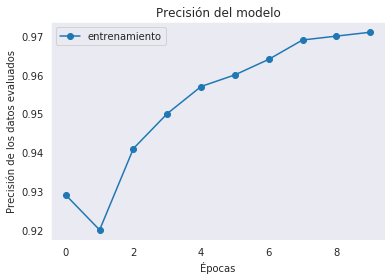

In [12]:
#Gráfico de precisión del clasificador 

plt.plot(history.history['accuracy'], 'o-')
plt.title('Precisión del modelo')
plt.ylabel('Precisión de los datos evaluados')
plt.xlabel('Épocas')
plt.legend(['entrenamiento'], loc='upper left')
plt.grid()
plt.show()

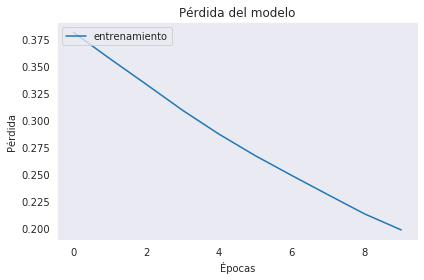

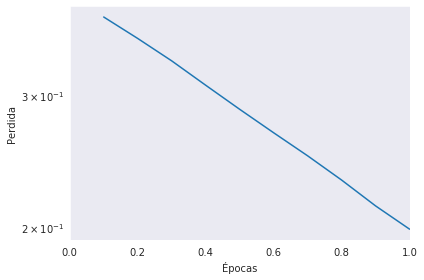

In [16]:
#Gráfico de perdida

plt.plot(history.history['loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(['entrenamiento'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

nsteps = len(history.history['loss'])
ntr = Xtr.shape[0]
epochs = np.arange(1, nsteps + 1)*batch_size/ntr
plt.semilogy(epochs, history.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Perdida')
plt.grid()
plt.xlim([0, np.max(epochs)])
plt.tight_layout()

In [17]:
#Modelo ajustado
model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='sigmoid', name= 'hidden'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

#Ajuste de la rapidez de aprendizaje
opt = optimizers.Adam(lr = 0.01)
model.compile(optimizer=opt, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
batch_size = 100
history= model.fit(Xtr_scale, ytr, epochs = 10, batch_size=batch_size, validation_data=(Xts_scale, yts))

Train on 1000 samples, validate on 372 samples
Epoch 1/10
1000/1000 [==============================] - 0s 27us/step - loss: 0.0423 - accuracy: 0.9840 - val_loss: 0.0480 - val_accuracy: 0.9785
Epoch 2/10
1000/1000 [==============================] - 0s 30us/step - loss: 0.0398 - accuracy: 0.9870 - val_loss: 0.0457 - val_accuracy: 0.9758
Epoch 3/10
1000/1000 [==============================] - 0s 23us/step - loss: 0.0382 - accuracy: 0.9840 - val_loss: 0.0446 - val_accuracy: 0.9758
Epoch 4/10
1000/1000 [==============================] - 0s 74us/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9839
Epoch 5/10
1000/1000 [==============================] - 0s 25us/step - loss: 0.0349 - accuracy: 0.9860 - val_loss: 0.0408 - val_accuracy: 0.9758
Epoch 6/10
1000/1000 [==============================] - 0s 74us/step - loss: 0.0338 - accuracy: 0.9880 - val_loss: 0.0397 - val_accuracy: 0.9785
Epoch 7/10
1000/1000 [==============================] - 0s 23us/step - loss: 0.0321

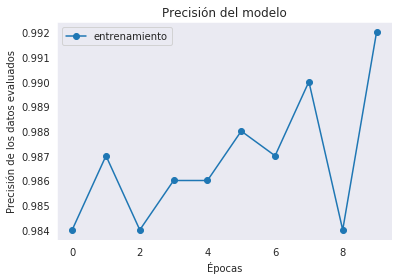

In [20]:
#Gráfico de precisión del clasificador 

plt.plot(history.history['accuracy'], 'o-')
plt.title('Precisión del modelo')
plt.ylabel('Precisión de los datos evaluados')
plt.xlabel('Épocas')
plt.legend(['entrenamiento'], loc='upper left')
plt.grid()
plt.show()

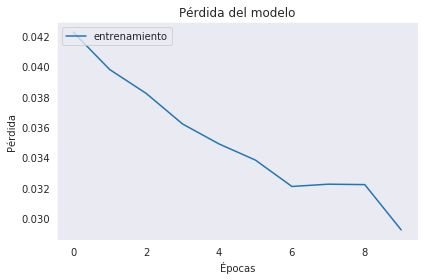

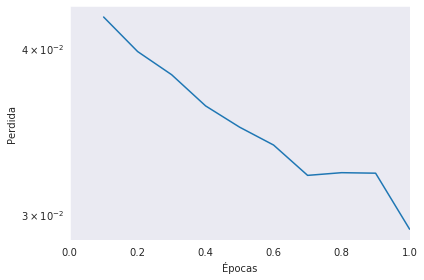

In [23]:
#Gráfico de perdida

plt.plot(history.history['loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(['entrenamiento'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

nsteps = len(history.history['loss'])
ntr = Xtr.shape[0]
epochs = np.arange(1, nsteps + 1)*batch_size/ntr
plt.semilogy(epochs, history.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Perdida')
plt.grid()
plt.xlim([0, np.max(epochs)])
plt.tight_layout()

#Resultados: esta función de pérdida converge más rápido que la anterior porque la tasa de aprendizaje es mayor
##Sin embargo, la precisión de este aprendizaje es más alta que línea de la Regresión Logística

In [24]:
#Matriz de confusión
y_predict = model.predict_classes(Xts)
from sklearn.metrics import confusion_matrix, classification_report
confMatrix = confusion_matrix(yts, y_predict)
print(confMatrix)

[[206   0]
 [ 84  82]]


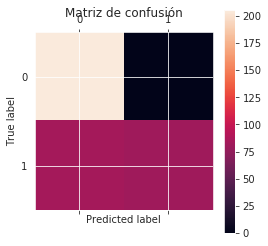

In [25]:
plt.matshow(confMatrix)
plt.title('Matriz de confusión')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#La matriz de confusión indica que hubo 227 predicciones verdaderas negativas,
# 180 verdaderas positivas, 0 falsas negativas y
# 5 falsas positivas

In [26]:
#Comparación optima utilzando el clasificador RandomForest
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier()
rc.fit(Xtr, ytr)

y_predict = rc.predict(Xts)
print(classification_report(yts, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       206
           1       0.99      0.99      0.99       166

    accuracy                           0.99       372
   macro avg       0.99      0.99      0.99       372
weighted avg       0.99      0.99      0.99       372



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import pred

In [28]:
from sklearn.metrics import accuracy_score
print("Precisión del modelo : %.5f" % accuracy_score(yts, y_predict))

Precisión del modelo : 0.98925


In [88]:
# Predicción de una nuevo billete pre-procesado
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
le = LabelEncoder()
y = le.fit_transform(y)
n_features = X.shape[1]

#Definir un nueva entrada de datos
billete_crudo=[45.1342,-0.0547,2.7386,0.0000]
nuevo_billete= np.array([billete_crudo],dtype=np.float32)

#Realizar la prediccion 
yhat= model.predict_classes(nuevo_billete)

#Transformada inversa para generar
yhat= le.inverse_transform(yhat)

print("Predicción\n")
if yhat[0]==1:
    print("Billete autentico: clase {}".format(int(yhat[0])))
else:
    print("Billete falso: clase {}".format(int(yhat[0])))


Predicción

Billete falso: clase 0
